In [2]:
%matplotlib inline
%precision 3

u'%.3f'

In [3]:
import thinkstats2
import thinkplot
import ReadCsvs as rc
import JointAngFuncs as jaf
import KneeAngleHypTest as kneehyp
import math
import numpy as np

In [4]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

####Computes the joint angles and plots them

In [5]:
def JointAngles(AFO, PPAFO, Shoes, fw, pnum, trial, mark1, mark2, mark3):
    """
    This function computes the joint angles for a given participant, trial and set of markers
    
    fw: a string that defines the footwear being studied; Should be either 'AFO', 'PPAFO' or 'Shoes'
    pnum: integer value for the participant number; Should be a number between 1 and 16
    trial: integer value for the trial number being studied; Should be a number between 1 and 10
    mark1: a string that defines the marker label for the marker above the joint being studied
    mark2: a string that defines the marker label for the marker at the joint being studied
    mark3: a string that defines the marker label for the marker below the joint being studied
    
    returns indices (a list of frame numbers), theta_t (a list of joint angles in radians)
    """
    
    theta_t=[]
    
    if fw=='AFO':
        dset=AFO
        
    if fw=='PPAFO':
        dset=PPAFO
        
    if fw=='Shoes':
        dset=Shoes
        
        
    MT_Obj=dset[pnum].GetTrial(trial) #AFO trial 4 for participant 1

    mark1_x = MT_Obj.x[mark1]
    mark2_x = MT_Obj.x[mark2]
    mark3_x = MT_Obj.x[mark3]

    #mark1_y = MT_Obj.y[mark1]
    #mark2_y = MT_Obj.y[mark2]
    #mark3_y = MT_Obj.y[mark3]

    mark1_z = MT_Obj.z[mark1]
    mark2_z = MT_Obj.z[mark2]
    mark3_z = MT_Obj.z[mark3]

#    x_dir_vec=[1,0,0]
#    y_dir_vec=[0,1,0]
#    z_dir_vec=[0,0,1]

    for i in range(len(mark1_x)):
    
        vec21_x=mark1_x[i]-mark2_x[i]
        #vec21_y=mark1_y[i]-mark2_y[i]
        vec21_z=mark1_z[i]-mark2_z[i]
        
        vec23_x=mark3_x[i]-mark2_x[i]
        #vec23_y=mark3_y[i]-mark2_y[i]
        vec23_z=mark3_z[i]-mark2_z[i]
    
        #vec12=[vec21_x, vec21_y, vec21_z]
        vec12=[vec21_x, vec21_z]
        #vec23=[vec23_x, vec23_y, vec23_z]
        vec23=[vec23_x, vec23_z]
    
        #Apply cos (theta) = (A dot B)/(modA modB)
        theta=math.acos((np.dot(vec12, vec23))/((np.linalg.norm(vec12))*(np.linalg.norm(vec23))))
    
        theta_t.append(theta/math.pi*180)
    
    indices=MT_Obj.x.index.get_values()
    
    return indices, theta_t


def AngleDiff(AFO, PPAFO, Shoes, fw, participant, baselineTrial, WalkTrial, mark1, mark2, mark3, plot=False, reverse=False):
    """
    This function computes the difference between each angle in the walking trial and the median of the baseline trial to
    obtain the change in angle from baseline while the participant is walking.
    
    fw: a string that defines the footwear being studied; Should be either 'AFO', 'PPAFO' or 'Shoes'
    participant: integer value for the participant number; Should be a number between 1 and 16
    WalkTrial: integer value for the trial number of the walking trial being studied; Should be a number between 4 and 10
    mark1: a string that defines the marker label for the marker above the joint being studied
    mark2: a string that defines the marker label for the marker at the joint being studied
    mark3: a string that defines the marker label for the marker below the joint being studied
    
    returns R_angle_changes (list of change in joint angle from baseline in degrees)
    """

    #trial=3

    R_ind_base, R_theta_base=JointAngles(AFO, PPAFO, Shoes, fw, participant, baselineTrial, mark1, mark2, mark3)
    
    cdf1=thinkstats2.Cdf(R_theta_base)
    median_R=cdf1.Percentile(50)
    #print "Baseline Median =", median_R
    
    #trial=WalkTrial
    R_ind, R_theta=JointAngles(AFO, PPAFO, Shoes, fw, participant, WalkTrial, mark1, mark2, mark3)
    
    if plot==True:
        
        thinkplot.Cdf(cdf1)
        thinkplot.Show(legend=False, title='Angle Baseline', xlabel='Angle in degrees', ylabel='CDF')
        thinkplot.Plot(R_ind_base, R_theta_base)
        #thinkplot.Config(ylim=[135,145])
        thinkplot.Show(legend=False, title='Angle Baseline Time Series', xlabel='Time in frames', ylabel='Angle in degrees')

    
        cdf3=thinkstats2.Cdf(R_theta)
        thinkplot.Cdf(cdf3)
        thinkplot.Show(legend=False, title='Walking', xlabel='Angle in degrees', ylabel='CDF')
        thinkplot.Plot(R_ind, R_theta)
        #thinkplot.Config(ylim=[135,145])
        thinkplot.Show(legend=False, title='Walking Time Series', xlabel='Time in frames', ylabel='Angle in degrees')

    R_angle_changes=[]

    if reverse==True:
        for eachang in R_theta:
            R_angle_changes.append(-(eachang-median_R))
    elif reverse==False:
        for eachang in R_theta:
            R_angle_changes.append((eachang-median_R))
        
        
    return R_angle_changes

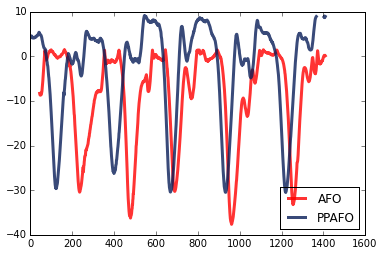

In [23]:
Raw_AFO_R_angle=AngleDiff(AFO, PPAFO, Shoes,'AFO', 2, 1, 6, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', False, False)
Raw_PPAFO_R_angle=AngleDiff(AFO, PPAFO, Shoes,'PPAFO', 2, 1, 6, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', False, False)
Raw_Shoes_R_angle=AngleDiff(AFO, PPAFO, Shoes,'Shoes', 2, 1, 6, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', False, False)

thinkplot.Plot(Raw_AFO_R_angle, label='AFO', color='red')
thinkplot.Plot(Raw_PPAFO_R_angle, label='PPAFO')
thinkplot.Show(legend=True, loc='lower right')

Note on reading the angles: Swinging your leg out increases the knee angle, bending your knees decreases your knee angle

#### This was the original hypothesis test that relied on the anglediff computation above

In [19]:
print kneehyp.KneeAngleHypTest(Raw_PPAFO_R_angle, Raw_AFO_R_angle)

Actual Observed Effect Size= 5.36224370626
0.0


####This is a generalized version of the knee angle hypothesis test that computes its own anglediff data internally

In [8]:
print kneehyp.KneeAngleHypTest_General(AFO, PPAFO, Shoes, 'PPAFO', 'AFO', 2, 1, 6)

Actual Observed Effect Size= 2.23788844538
0.0


####This portion conducts the knee angle hypothesis on all paticipants

In [9]:
t=dict()
for participant in AFO.keys():
    afo_keys=AFO[participant].trials.keys()
    ppafo_keys=PPAFO[participant].trials.keys()
    overlap=set(afo_keys) & set(ppafo_keys)
    print 'ppafo=', ppafo_keys
    
    if overlap:
    
        baselinetrial=min(overlap)
    
        for eachtrial in overlap:
            if eachtrial>3:
                print "Participant=", participant
                print 'eachtrial=', eachtrial
                result=kneehyp.KneeAngleHypTest_General(AFO, PPAFO, Shoes,'PPAFO', 'AFO', participant, baselinetrial, eachtrial)
                t[(participant, eachtrial)]=result
        

ppafo= [1, 2, 3, 4, 5, 6, 7, 8, 9]
Participant= 1
eachtrial= 4
Actual Observed Effect Size= 2.3226950499
Participant= 1
eachtrial= 5
Actual Observed Effect Size= 0.128361115943
Participant= 1
eachtrial= 6
Actual Observed Effect Size= 0.556727320717
Participant= 1
eachtrial= 7
Actual Observed Effect Size= 0.245453094052
Participant= 1
eachtrial= 8
Actual Observed Effect Size= -0.478241926151
Participant= 1
eachtrial= 9
Actual Observed Effect Size= 0.733107406536
ppafo= [1, 2, 3, 4, 5, 6, 7, 8]
Participant= 2
eachtrial= 4
Actual Observed Effect Size= -1.60876196359
Participant= 2
eachtrial= 5
Actual Observed Effect Size= 1.63606779724
Participant= 2
eachtrial= 6
Actual Observed Effect Size= 2.23788844538
Participant= 2
eachtrial= 7
Actual Observed Effect Size= nan
Participant= 2
eachtrial= 8
Actual Observed Effect Size= nan
ppafo= [3, 4, 5, 6, 7, 8, 9]
Participant= 3
eachtrial= 5
Actual Observed Effect Size= nan
Participant= 3
eachtrial= 6
Actual Observed Effect Size= nan
Participant= 3


/Users/jpoh/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


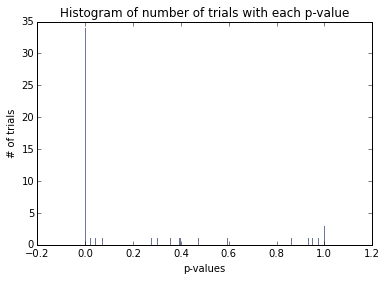

[0.0, 1.0, 0.975, 0.864, 0.952, 0.073, 0.277, 0.041, 0.394, 0.357, 0.596, 0.934, 0.473, 0.399, 0.303, 0.023]
(13, 8)
(13, 4)
(9, 4)
(12, 9)
(4, 4)
(1, 5)
(12, 10)
(12, 7)
(13, 6)
(1, 8)
(1, 7)
(9, 5)
(2, 4)
(12, 8)


In [10]:
hist=thinkstats2.Hist(t.values())
thinkplot.Hist(hist)
thinkplot.Show(legend=False, xlabel='p-values', ylabel='# of trials', title='Histogram of number of trials with each p-value')

print hist.Values()

for key in t.keys():
    if t[key]>0.1:
        print key
        #print t[key]